# 多维随机变量

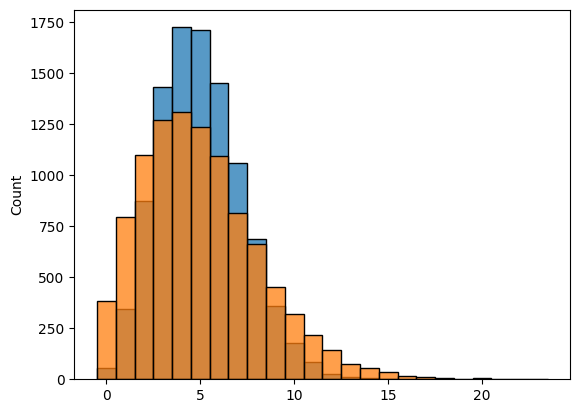

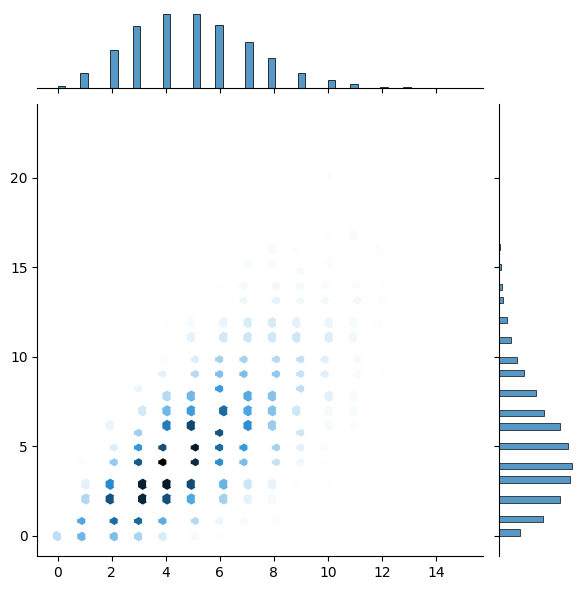

In [1]:
## 例：XY的联合分布和边缘分布
import numpy as np
import seaborn as sns

x=np.random.poisson(5,10000)
y = [np.random.poisson(i) for i in x]

sns.histplot(x,discrete=True)
sns.histplot(y,discrete=True) 
g0=sns.jointplot(x=x, y=y,kind="hex")

若多个随机变量构建新的变量，Z= g(X,Y), 则可以通过联合分布得到Z的分布

\[ E(g(X,Y)) = \sum_x\sum_y g(x,y)p(x,y)\]

若g是X,Y的线性函数时

\[ E(aX+bY+c) = a E(X)+ bE(Y)+c\]


班上有300个学生，每人得A的概率是1/3。X是班上得到A的学生的总数，问X的期望值？

In [2]:
import scipy.stats as st
n=300;p=1/3
mean, var, skew, kurt = st.binom.stats(n,p, moments='mvsk')
print(mean, var, skew, kurt)

100.0 66.66666666666667 0.04082482904638632 -0.0049999999999999975


## 多维正态分布

二维正态随机变量 $(\boldsymbol{X}_1, \boldsymbol{X}_2)$ 的概率密度函数为：

$$
f(x_1, x_2) = \frac{1}{2\pi\sigma_1\sigma_2\sqrt{1-\rho^2}} \exp \left\{ \frac{-1}{2(1-\rho^2)} \left[ \frac{(x_1 - \mu_1)^2}{\sigma_1^2} + \frac{(x_2 - \mu_2)^2}{\sigma_2^2} - 2\rho \frac{(x_1 - \mu_1)(x_2 - \mu_2)}{\sigma_1\sigma_2} \right] \right\}
$$

将上式中的协方差矩阵 $\boldsymbol{C}$ 写成矩阵形式，为：

$$
\boldsymbol{C} = \begin{pmatrix}
c_{11} & c_{12} \\
c_{21} & c_{22}
\end{pmatrix} = \begin{pmatrix}
\sigma_1^2 & \rho\sigma_1\sigma_2 \\
\rho\sigma_1\sigma_2 & \sigma_2^2
\end{pmatrix}
$$

它的行列式 $\det \boldsymbol{C} = \sigma_1^2\sigma_2^2(1-\rho^2)$，$\boldsymbol{C}$ 的逆矩阵为：

$$
\boldsymbol{C}^{-1} = \frac{1}{\det \boldsymbol{C}} \begin{pmatrix}
\sigma_2^2 & -\rho\sigma_1\sigma_2 \\
-\rho\sigma_1\sigma_2 & \sigma_1^2
\end{pmatrix} = \frac{1}{\sigma_1^2\sigma_2^2(1-\rho^2)} \begin{pmatrix}
\sigma_2^2 & -\rho\sigma_1\sigma_2 \\
-\rho\sigma_1\sigma_2 & \sigma_1^2
\end{pmatrix}
$$

经过计算可知，这里矩阵 $(\boldsymbol{X}-\boldsymbol{\mu})^T$ 是 $(\boldsymbol{X}-\boldsymbol{\mu})$ 的转置矩阵：

$$
(\boldsymbol{X}-\boldsymbol{\mu})^T \boldsymbol{C}^{-1} (\boldsymbol{X}-\boldsymbol{\mu}) = \frac{1}{\det \boldsymbol{C}} \begin{pmatrix}
x_1 - \mu_1 & x_2 - \mu_2
\end{pmatrix} \begin{pmatrix}
\sigma_2^2 & -\rho\sigma_1\sigma_2 \\
-\rho\sigma_1\sigma_2 & \sigma_1^2
\end{pmatrix} \begin{pmatrix}
x_1 - \mu_1 \\
x_2 - \mu_2
\end{pmatrix} = \frac{1}{\sigma_1^2\sigma_2^2(1-\rho^2)} \left[ (x_1 - \mu_1)^2 \sigma_2^2 + (x_2 - \mu_2)^2 \sigma_1^2 - 2\rho (x_1 - \mu_1)(x_2 - \mu_2) \sigma_1\sigma_2 \right]
$$

于是 $(\boldsymbol{X}_1, \boldsymbol{X}_2)$ 的概率密度函数可写成：

$$
f(x_1, x_2) = \frac{1}{2\pi\sqrt{\det \boldsymbol{C}}} \exp \left\{ -\frac{1}{2} (\boldsymbol{X}-\boldsymbol{\mu})^T \boldsymbol{C}^{-1} (\boldsymbol{X}-\boldsymbol{\mu}) \right\}
$$

好的，以下是图片中公式的OCR结果，使用Markdown公式表示，其中向量用 `\boldsymbol` 表示：

二维正态随机变量 $(\boldsymbol{X}_1, \boldsymbol{X}_2)$ 的概率密度函数为：

$$
f(x_1, x_2) = \frac{1}{(2\pi)^{2/2} (\det \boldsymbol{C})^{1/2}} \exp \left\{ -\frac{1}{2} (\boldsymbol{X}-\boldsymbol{\mu})^T \boldsymbol{C}^{-1} (\boldsymbol{X}-\boldsymbol{\mu}) \right\}
$$

上式容易推广到 $n$ 维正态随机变量 $(\boldsymbol{X}_1, \boldsymbol{X}_2, \cdots, \boldsymbol{X}_n)$ 的情况。引入列矩阵：

$$
\boldsymbol{X} = \begin{pmatrix}
x_1 \\
x_2 \\
\vdots \\
x_n
\end{pmatrix} \quad \text{和} \quad \boldsymbol{\mu} = \begin{pmatrix}
\mu_1 \\
\mu_2 \\
\vdots \\
\mu_n
\end{pmatrix} = \begin{pmatrix}
E(\boldsymbol{X}_1) \\
E(\boldsymbol{X}_2) \\
\vdots \\
E(\boldsymbol{X}_n)
\end{pmatrix}
$$

$n$ 维正态随机变量 $(\boldsymbol{X}_1, \boldsymbol{X}_2, \cdots, \boldsymbol{X}_n)$ 的概率密度定义为：

$$
f(x_1, x_2, \cdots, x_n) = \frac{1}{(2\pi)^{n/2} (\det \boldsymbol{C})^{1/2}} \exp \left\{ -\frac{1}{2} (\boldsymbol{X}-\boldsymbol{\mu})^T \boldsymbol{C}^{-1} (\boldsymbol{X}-\boldsymbol{\mu}) \right\}
$$

其中 $\boldsymbol{C}$ 是 $(\boldsymbol{X}_1, \boldsymbol{X}_2, \cdots, \boldsymbol{X}_n)$ 的协方差矩阵。

[[-4.  -4.  -4.  ... -4.  -4.  -4. ]
 [-3.9 -3.9 -3.9 ... -3.9 -3.9 -3.9]
 [-3.8 -3.8 -3.8 ... -3.8 -3.8 -3.8]
 ...
 [ 5.7  5.7  5.7 ...  5.7  5.7  5.7]
 [ 5.8  5.8  5.8 ...  5.8  5.8  5.8]
 [ 5.9  5.9  5.9 ...  5.9  5.9  5.9]]
[[-4.   -3.94 -3.88 ...  1.82  1.88  1.94]
 [-4.   -3.94 -3.88 ...  1.82  1.88  1.94]
 [-4.   -3.94 -3.88 ...  1.82  1.88  1.94]
 ...
 [-4.   -3.94 -3.88 ...  1.82  1.88  1.94]
 [-4.   -3.94 -3.88 ...  1.82  1.88  1.94]
 [-4.   -3.94 -3.88 ...  1.82  1.88  1.94]]
[[[-4.   -4.  ]
  [-4.   -3.94]
  [-4.   -3.88]
  ...
  [-4.    1.82]
  [-4.    1.88]
  [-4.    1.94]]

 [[-3.9  -4.  ]
  [-3.9  -3.94]
  [-3.9  -3.88]
  ...
  [-3.9   1.82]
  [-3.9   1.88]
  [-3.9   1.94]]

 [[-3.8  -4.  ]
  [-3.8  -3.94]
  [-3.8  -3.88]
  ...
  [-3.8   1.82]
  [-3.8   1.88]
  [-3.8   1.94]]

 ...

 [[ 5.7  -4.  ]
  [ 5.7  -3.94]
  [ 5.7  -3.88]
  ...
  [ 5.7   1.82]
  [ 5.7   1.88]
  [ 5.7   1.94]]

 [[ 5.8  -4.  ]
  [ 5.8  -3.94]
  [ 5.8  -3.88]
  ...
  [ 5.8   1.82]
  [ 5.8   1.88]


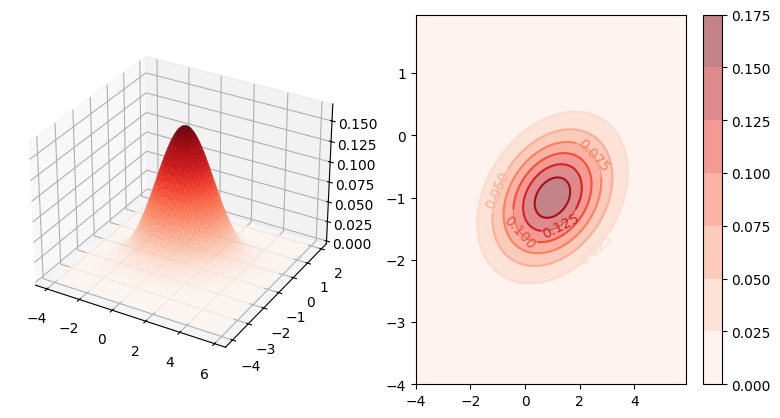

In [6]:
from scipy.stats import multivariate_normal,norm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

xmin=-4;xmax=6;ymin=-4;ymax=2
xmean=1;ymean=-1
cov=np.array([[2.0, 0.3], [0.3, 0.5]])
#cmapV='Set3'
cmapV='Reds'

##定义网格坐标
x, y = np.mgrid[xmin:xmax:.1, ymin:ymax:.06]
pos = np.dstack((x, y))
print(x,y,pos,sep='\n')

##定义二维正态分布的pdf
rv = multivariate_normal([xmean, ymean],cov )

fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 2, 1, projection='3d') #subplot1,2,1,分为1行2列，得到第一列

ax.plot_surface(x, y, rv.pdf(pos), rstride=1, cstride=1, cmap=cmapV, edgecolor='none')

ax2 = fig.add_subplot(1, 2, 2)

##用颜色表示密度概率函数
pos2=ax2.contourf(x, y, rv.pdf(pos),6,cmap=cmapV,alpha=0.5)
##等高线
cset=ax2.contour(x, y, rv.pdf(pos),6,cmap=cmapV)
##等高线的数值
ax2.clabel(cset, inline=1, fontsize=10)
##密度概率值与颜色对应图例
fig.colorbar(pos2)

plt.show()

## 边缘分布
对于给定给定$\mu_1$,$\mu_2$, $\sigma_1$,$\sigma_2$,$\rho$的二维正态分布，不同的$\pho$对应不同的二位正态分布，他们的边缘分布是一样的

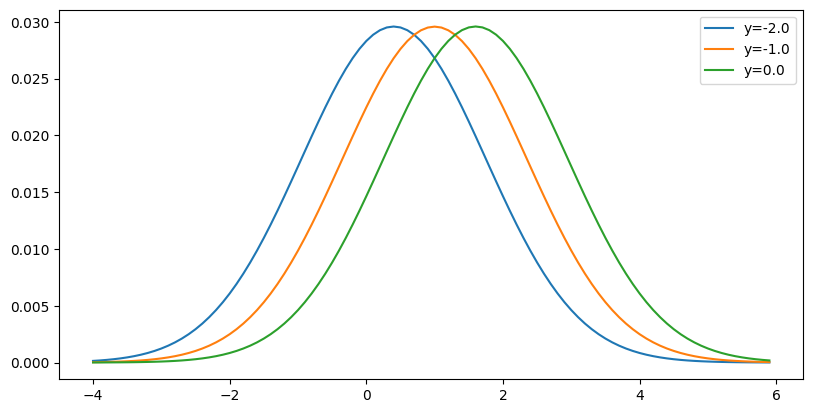

In [7]:
rv = multivariate_normal([xmean, ymean],cov )

fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(111) ##1,1,1简写

x1d = np.arange(xmin,xmax,.1)
y1d = np.arange(-2,-2,.06)

for yval in [-2,-1,0]:
    z=[]
    for i in x1d:
        z.append(rv.pdf([i,yval]))
    con=ax.plot(x1d,z/sum(z),label="y={:.1f}".format(yval))
plt.legend()

## 条件分布

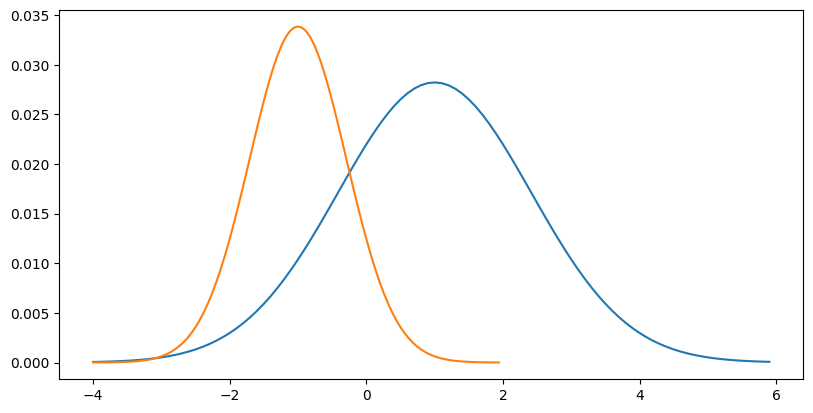

In [13]:
from scipy.stats.contingency import margins

fig2 = plt.figure(figsize=plt.figaspect(0.5))
ax3 = fig2.add_subplot(111)

x1d = np.arange(xmin,xmax,.1)
y1d = np.arange(ymin,ymax,.06)

xmargin, ymargin = margins(rv.pdf(pos))

ax3.plot(x1d,xmargin/sum(xmargin),y1d,ymargin.T/sum(ymargin.T))

## 多维随机变量



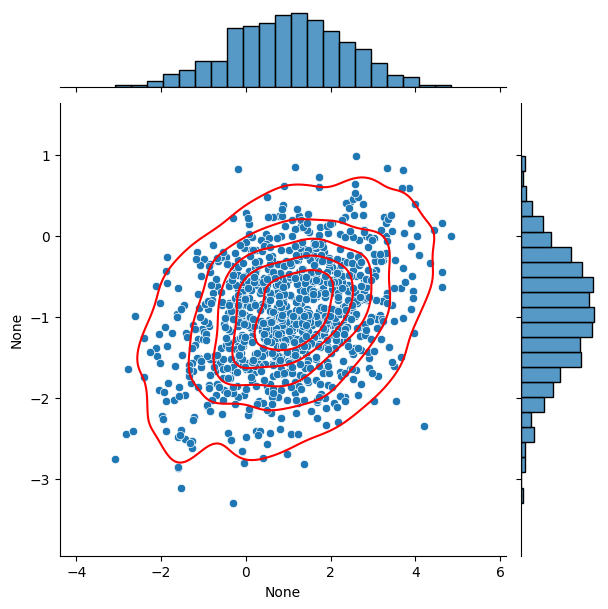

In [17]:
cov=np.array([[2.0, 0.3], [0.3, 0.5]])

rns=multivariate_normal.rvs(mean=[xmean,ymean], cov=cov,size=1000)
g=sns.jointplot(x=rns[:,0],y=rns[:,1])
g.plot_joint(sns.kdeplot, color="r", levels=6)

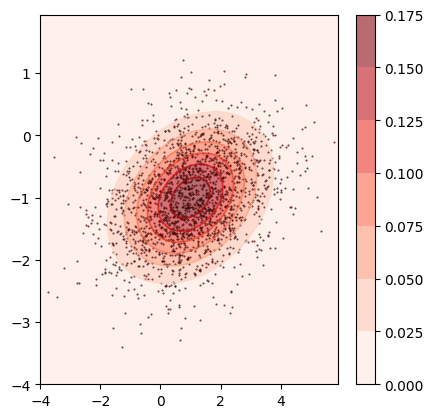

In [20]:
fig2 = plt.figure(figsize=plt.figaspect(1))
ax3 = fig2.add_subplot(111)

rns=multivariate_normal.rvs(mean=[xmean,ymean], cov=cov,size=2000)
ax3.plot(rns[:,0],rns[:,1] ,'ro', alpha=.6,markersize=1,
        markeredgecolor='k', markeredgewidth=0.5)
# rns[:,0]：表示所有样本的 x 坐标, rns[:,1]表示所有y坐标

conf=ax3.contourf(x, y, rv.pdf(pos),6,cmap=cmapV,alpha=0.6)
ax3.contour(x, y, rv.pdf(pos),6,cmap=cmapV,alpha=0.6)
plt.colorbar(conf) # 为等高线图添加颜色条